In [160]:
import warnings
warnings.filterwarnings('ignore')

In [161]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats

In [162]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import os
import numpy
import requests as rq
import pandas as pd
from io import BytesIO
import json
from scipy.stats import linregress
import matplotlib.pyplot as plt




In [22]:
#Create path and read the  labor force participation and Human Development Index cvs.  
#Convert them into data frames.
#Set Country Name as index.
#Format numbers to 2 decimal places for easier data reading.
#Rename some columns.

csv_path = os.path.join('clean_data','labor_force_participation.csv')
with open(csv_path) as csvfile:
    labor_force_df = pd.read_csv(csv_path, header=[0])
    labor_force_df = pd.DataFrame(labor_force_df)
    labor_force_df = labor_force_df.set_index('Country Name')
    

csv_path = os.path.join('clean_data','hci_df.csv')
with open(csv_path) as csvfile:
    HCI_df = pd.read_csv(csv_path, header=[0])
    HCI_df = pd.DataFrame(HCI_df)
    HCI_df = HCI_df.set_index('Country Name')
    HCI_df = HCI_df.rename(columns={"2018 [YR2018]": "HCI"})
    HCI_df["HCI"] = HCI_df["HCI"].map("{:.2f}".format)
   

#HCI_df
labor_force_df


,Labor Force Participation Female - 2018,Labor Force Participation Male - 2018
Country Name,,
Brazil,60.90,79.97
Argentina,59.02,79.70
Colombia,62.55,85.12
United States,67.23,78.00
United Kingdom,73.08,82.40
United Arab Emirates,53.16,93.95
Turkey,38.15,78.39
Norway,75.27,80.13
Greece,60.17,76.56


In [23]:
HCI_total= pd.merge(HCI_df, labor_force_df, how="left", on=["Country Name"])
hci = HCI_total.astype(float)
hci.dtypes
HCI_total
#pd.to_numeric(HCI_total["Labor Force Participation Female - 2018"]).astype(int)
#pd.to_numeric(HCI_total["Labor Force Participation Male - 2018"]).astype(int)
#HCI_total

,HCI,Labor Force Participation Female - 2018,Labor Force Participation Male - 2018
Country Name,,,
Brazil,0.55,60.90,79.97
Argentina,0.62,59.02,79.70
Colombia,0.60,62.55,85.12
United States,0.71,67.23,78.00
United Kingdom,0.78,73.08,82.40
United Arab Emirates,0.68,53.16,93.95
Turkey,0.63,38.15,78.39
Norway,0.77,75.27,80.13
Greece,0.69,60.17,76.56


## Is female labor participation related to a Human Capital Index (HCI) over 0.5 ?

In [24]:
HCI_count = len(HCI_total['HCI'])
HCI_count

18

In [25]:
HCI_total

,HCI,Labor Force Participation Female - 2018,Labor Force Participation Male - 2018
Country Name,,,
Brazil,0.55,60.90,79.97
Argentina,0.62,59.02,79.70
Colombia,0.60,62.55,85.12
United States,0.71,67.23,78.00
United Kingdom,0.78,73.08,82.40
United Arab Emirates,0.68,53.16,93.95
Turkey,0.63,38.15,78.39
Norway,0.77,75.27,80.13
Greece,0.69,60.17,76.56


In [37]:
HCI_total['HCI'] = HCI_total['HCI'].astype(float)

HCI_high_ranking = HCI_total[(HCI_total['HCI'] >= 0.5)]
#HCI_ranking = HCI_total('HCI_ranking', ascending=False)
#HCI_count = len(HCI_ranking['HCI'])
HCI_low_ranking = HCI_total[(HCI_total['HCI'] < 0.5)]



#Passing_HCI_ranking = 100 * (HCI_ranking / HCI_count)
#Countries_high_hci = HCI_ranking.groupby(["Country Name"])

#Passing_HCI_ranking

#High_HCI_ranking = HCI_ranking.groupby(["Country Name"])

In [38]:
HCI_high_ranking

,HCI,Labor Force Participation Female - 2018,Labor Force Participation Male - 2018
Country Name,,,
Brazil,0.55,60.90,79.97
Argentina,0.62,59.02,79.70
Colombia,0.60,62.55,85.12
United States,0.71,67.23,78.00
United Kingdom,0.78,73.08,82.40
United Arab Emirates,0.68,53.16,93.95
Turkey,0.63,38.15,78.39
Norway,0.77,75.27,80.13
Greece,0.69,60.17,76.56


In [39]:
HCI_low_ranking

,HCI,Labor Force Participation Female - 2018,Labor Force Participation Male - 2018
Country Name,,,
India,0.48,22.16,79.70
Nigeria,0.35,49.11,62.38
South Africa,0.42,53.85,66.19
"Egypt, Arab Rep.",0.49,20.02,75.25


In [40]:
############################this can go
#labor_force_participation_plot = plt.scatter(HCI_total['Labor Force Participation Female - 2018'],HCI_total
                                          #   ['Labor Force Participation Male - 2018'],marker='o',edgecolors='black')
#plt.grid()
#plt.title('Female Participation vs. Male Participation',size=18)
#plt.xlabel('Female labor participation',size=15)
#plt.ylabel('Male labor participation',size=15)
#plt.savefig('images/female_hci.png')
#plt.show()


### Female Labor Participation in correlation to HCI has a correlation r of 0.66, which means there is a moderate/strong uphill (positive) relationship

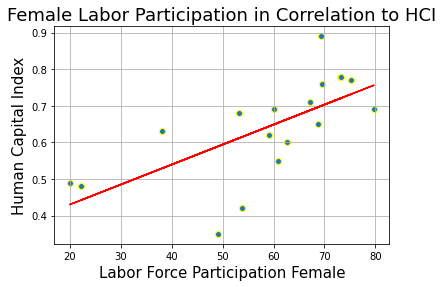

The r squared is: 0.6647426382111475


In [41]:
#Set up linear regression
x_values = HCI_total['Labor Force Participation Female - 2018']
y_values = HCI_total['HCI']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
hci_famale_labor_regression = plt.scatter(x_values,y_values,marker='o',edgecolors='yellow')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,0),fontsize=15,color='red')
plt.grid()
plt.title('Female Labor Participation in Correlation to HCI',size=18)
plt.xlabel('Labor Force Participation Female',size=15)
plt.ylabel('Human Capital Index',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')


### Male Labor Participation in correlation to HCI has a correlation r of 0.61, which means there is a moderate/strong uphill (positive) relationship

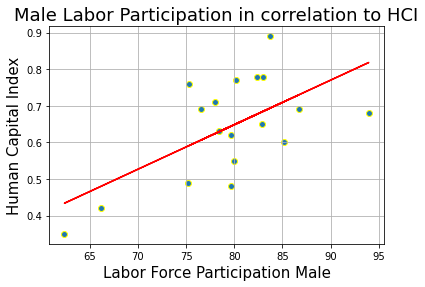

The r squared is: 0.6167220214669208


In [42]:
#Set up linear regression
x_values = HCI_total['Labor Force Participation Male - 2018']
y_values = HCI_total['HCI']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
hci_famale_labor_regression = plt.scatter(x_values,y_values,marker='o',edgecolors='yellow')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,0),fontsize=15,color='red')
plt.grid()
plt.title('Male Labor Participation in correlation to HCI',size=18)
plt.xlabel('Labor Force Participation Male',size=15)
plt.ylabel('Human Capital Index',size=15)
plt.show()

#r2
print(f'The r squared is: {rvalue}')

We wanted to see how closely the Female Labor Force Participation is related to High Ranking Human Capital Index. We generated a linear regression between the two variables and found a correlation r of 0.5 which means there is a  moderate uphill (positive) relationship

## Is having more female or male employers related to the Human Capital Index?

In [53]:
csv_path = os.path.join('clean_data','employers_df.csv')
with open(csv_path) as csvfile:
    employers_df = pd.read_csv(csv_path, header=[0])
    employers_df = pd.DataFrame(employers_df)
    employers_df = employers_df.set_index('Country Name')
    

csv_path = os.path.join('clean_data','hci_df.csv')
with open(csv_path) as csvfile:
    HCI_df = pd.read_csv(csv_path, header=[0])
    HCI_df = pd.DataFrame(HCI_df)
    HCI_df = HCI_df.set_index('Country Name')
    HCI_df = HCI_df.rename(columns={"2018 [YR2018]": "HCI"})
    HCI_df["HCI"] = HCI_df["HCI"].map("{:.2f}".format)
    
HCI_employers= pd.merge(HCI_df, employers_df, how="left", on=["Country Name"])
hci = HCI_employers.astype(float)
#hci.dtypes
#HCI_employers

csv_path = os.path.join('clean_data','labor_force_participation.csv')
with open(csv_path) as csvfile:
    labor_df = pd.read_csv(csv_path, header=[0])
    labor_df = pd.DataFrame(labor_df)
    labor_df = labor_df.set_index('Country Name')

HCI_employers_labor= pd.merge(HCI_employers, labor_df, how="left", on=["Country Name"])
hci = HCI_employers_labor.astype(float)

#employers_df
#labor_df
HCI_employers_labor


,HCI,Female - 2018,Male - 2018,Total - 2018,Labor Force Participation Female - 2018,Labor Force Participation Male - 2018
Country Name,,,,,,
Brazil,0.55,3.31,6.00,4.85,60.90,79.97
Argentina,0.62,2.62,4.86,3.91,59.02,79.70
Colombia,0.60,2.58,5.28,4.16,62.55,85.12
United States,0.71,1.63,2.84,2.28,67.23,78.00
United Kingdom,0.78,1.24,2.78,2.06,73.08,82.40
United Arab Emirates,0.68,1.40,3.35,3.02,53.16,93.95
Turkey,0.63,1.25,5.96,4.46,38.15,78.39
Norway,0.77,0.82,2.21,1.56,75.27,80.13
Greece,0.69,4.74,9.62,7.62,60.17,76.56


### Having female employers has a correlation r of 0.14 to the HCI, which means there is no relationship between the variables.

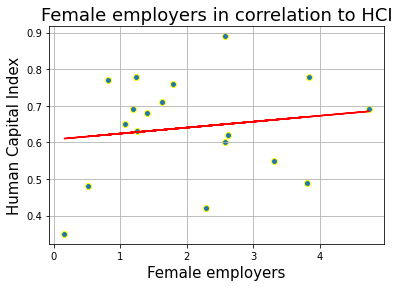

The r squared is: 0.14601286136818017


In [54]:
#Set up linear regression
x_values = HCI_employers['Female - 2018'].astype('float')
y_values = HCI_employers['HCI'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
hci_famale_labor_regression = plt.scatter(x_values,y_values,marker='o',edgecolors='yellow')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,0),fontsize=15,color='red')
plt.grid()
plt.title('Female employers in correlation to HCI',size=18)
plt.xlabel('Female employers',size=15)
plt.ylabel('Human Capital Index',size=15)
plt.show()

#r2

print(f'The r squared is: {rvalue}')

### Having female employers has a correlation r of -0.003 to female labor participation, which means there is strong downhill (negative) linear relationship.

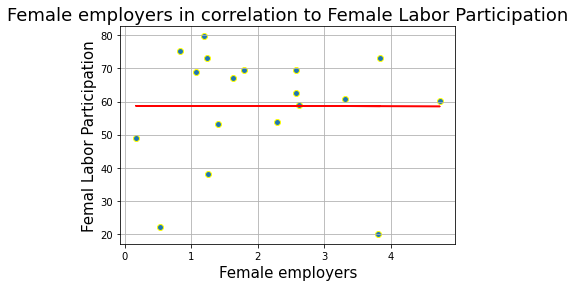

The r squared is: -0.0030544057331124597


In [55]:
#Set up linear regression
x_values = HCI_employers_labor['Female - 2018'].astype('float')
y_values = HCI_employers_labor['Labor Force Participation Female - 2018'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
hci_famale_labor_regression = plt.scatter(x_values,y_values,marker='o',edgecolors='yellow')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,0),fontsize=15,color='red')
plt.grid()
plt.title('Female employers in correlation to Female Labor Participation',size=18)
plt.xlabel('Female employers',size=15)
plt.ylabel('Femal Labor Participation',size=15)
plt.show()

#r2

print(f'The r squared is: {rvalue}')

### Having male employers has a correlation r of -0.06 to the HCI, which means there is strong downhill (negative) linear relationship.

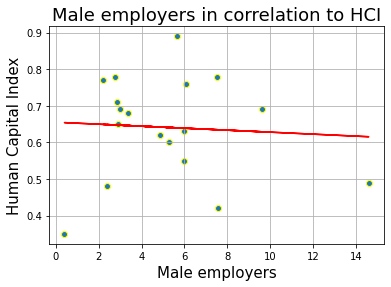

The r squared is: -0.06401711203149626


In [57]:
#Set up linear regression
x_values = HCI_employers['Male - 2018'].astype('float')
y_values = HCI_employers['HCI'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
hci_famale_labor_regression = plt.scatter(x_values,y_values,marker='o',edgecolors='yellow')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,0),fontsize=15,color='red')
plt.grid()
plt.title('Male employers in correlation to HCI',size=18)
plt.xlabel('Male employers',size=15)
plt.ylabel('Human Capital Index',size=15)
plt.show()

#r2

print(f'The r squared is: {rvalue}')

## Meassure the impact of labour sectors (agriculture, industry, services) on HCI and labor force participation

In [186]:

csv_path = os.path.join('clean_data','hci_df.csv')
with open(csv_path) as csvfile:
    HCI_df = pd.read_csv(csv_path, header=[0])
    HCI_df = pd.DataFrame(HCI_df)
    HCI_df = HCI_df.set_index('Country Name')
    HCI_df = HCI_df.rename(columns={"2018 [YR2018]": "HCI"})
    HCI_df["HCI"] = HCI_df["HCI"].map("{:.2f}".format)
    

csv_path = os.path.join('clean_data','labor_force_participation.csv')
with open(csv_path) as csvfile:
    labor_df = pd.read_csv(csv_path, header=[0])
    labor_df = pd.DataFrame(labor_df)
    labor_df = labor_df.set_index('Country Name')

HCI_labor= pd.merge(HCI_df, labor_df, how="left", on=["Country Name"])
hci = HCI_labor.astype(float)
#hci.dtypes
#HCI_employers

csv_path = os.path.join('clean_data','employment_by_sector.csv')
with open(csv_path) as csvfile:
    sectors_df = pd.read_csv(csv_path, header=[0])
    sectors_df = pd.DataFrame(sectors_df)
    sectors_df = sectors_df.set_index('Country Name')

HCI_els= pd.merge(HCI_labor, sectors_df, how="left", on=["Country Name"])
hci = HCI_els.astype(float)


#labor_df
#HCI_employers_labor


In [188]:
#add totals between sexes and map to df
HCI_els['Total LF'] = HCI_els['Labor Force Participation Male - 2018'] + HCI_els['Labor Force Participation Female - 2018']
HCI_els['Total A'] = HCI_els['Agricultural Employment Female - 2018'] + HCI_els['Agricultural Employment Male - 2018']
HCI_els['Total I'] = HCI_els['Industry Employment Female - 2018'] + HCI_els['Industry Employment Male - 2018']
HCI_els['Total S'] = HCI_els['Service Employment Female - 2018'] + HCI_els['Service Employment Male - 2018']
HCI_els

####################################JAKE...I want to add all the values of the column indstury total
############################### service total, agriculture total to create a pie graph.

#print (HCI_els.groupby(['Total A'])).sum('Total A')
#HCI_els.sum(axis = "Total A", skipna = True) 
#HCI_els(['Total A'], dtype="float64").sum()
# Labels for the sections of our pie chart
#labels = ["Humans", "Smurfs", "Hobbits", "Ninjas"]

# The values of each section of the pie chart
#sizes = [220, 95, 80, 100]

# The colors of each section of the pie chart
#3colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
#explode = (0.1, 0, 0, 0)
#HCI_els


,HCI,Labor Force Participation Female - 2018,Labor Force Participation Male - 2018,Agricultural Employment Female - 2018,Agricultural Employment Male - 2018,Industry Employment Female - 2018,Industry Employment Male - 2018,Service Employment Female - 2018,Service Employment Male - 2018,Total LF,Total A,Total I,Total S
Country Name,,,,,,,,,,,,,
Brazil,0.55,60.90,79.97,4.140000,13.060000,10.750000,27.090000,85.110001,59.840000,140.87,17.200000,37.840000,144.950001
Argentina,0.62,59.02,79.70,0.060000,0.120000,9.140000,31.309999,90.809998,68.570000,138.72,0.180000,40.450000,159.379997
Colombia,0.60,62.55,85.12,7.810000,23.070000,14.860000,23.660000,77.330002,53.279999,147.67,30.880000,38.520000,130.610001
United States,0.71,67.23,78.00,0.760000,1.890000,8.780000,29.360001,90.470001,68.750000,145.23,2.650000,38.140000,159.220001
United Kingdom,0.78,73.08,82.40,0.620000,1.470000,7.450000,27.530001,91.930000,71.000000,155.48,2.090000,34.980000,162.930000
United Arab Emirates,0.68,53.16,93.95,0.010000,1.760000,5.530000,40.450001,94.459999,57.790001,147.11,1.770000,45.980001,152.250000
Turkey,0.63,38.15,78.39,26.030001,14.860000,16.070000,31.639999,57.900002,53.500000,116.54,40.890000,47.709999,111.400002
Norway,0.77,75.27,80.13,1.090000,3.010000,7.000000,30.570000,91.910004,66.419998,155.40,4.100000,37.570000,158.330002
Greece,0.69,60.17,76.56,11.730000,12.640000,7.730000,20.480000,80.550003,66.879997,136.73,24.370000,28.210000,147.430000


In [ ]:
# Labels for the sections of our pie chart
labels = ["Humans", "Smurfs", "Hobbits", "Ninjas"]

# The values of each section of the pie chart
sizes = [220, 95, 80, 100]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0, 0, 0)

### Female and male employment in agriculture have a negative correlation of -0.55 to HCI.

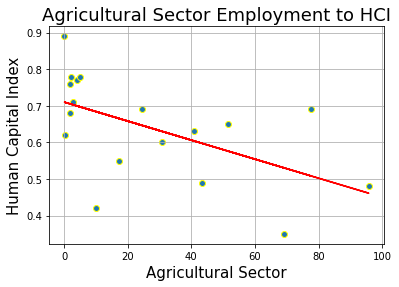

The r squared is: -0.5577630249665086


In [105]:
#Set up linear regression
x_values = HCI_els['Total A'].astype('float')
y_values = HCI_els['HCI'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
hci_famale_labor_regression = plt.scatter(x_values,y_values,marker='o',edgecolors='yellow')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,0),fontsize=15,color='red')
plt.grid()
plt.title('Agricultural Sector Employment to HCI',size=18)
plt.xlabel('Agricultural Sector',size=15)
plt.ylabel('Human Capital Index',size=15)
plt.show()

#r2

print(f'The r squared is: {rvalue}')

### Female and male employment in the industry sector have a negative correlation of -0.03 to HCI.

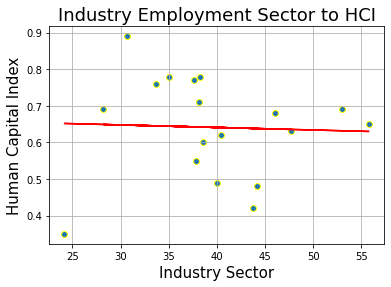

The r squared is: -0.039692439273503556


In [106]:
#Set up linear regression
x_values = HCI_els['Total I'].astype('float')
y_values = HCI_els['HCI'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
hci_famale_labor_regression = plt.scatter(x_values,y_values,marker='o',edgecolors='yellow')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,0),fontsize=15,color='red')
plt.grid()
plt.title('Industry Employment Sector to HCI',size=18)
plt.xlabel('Industry Sector',size=15)
plt.ylabel('Human Capital Index',size=15)
plt.show()

#r2

print(f'The r squared is: {rvalue}')

### Female and male employment in services have a moderate positive correlation of 0.51 to HCI.

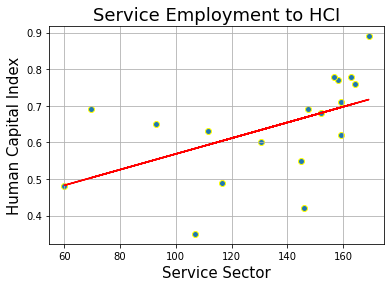

The r squared is: 0.5115631310163654


In [109]:
#Set up linear regression
x_values = HCI_els['Total S'].astype('float')
#y_values = HCI_els['Labor Force Participation Female - 2018'].astype('float')
y_values = HCI_els['HCI'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
hci_famale_labor_regression = plt.scatter(x_values,y_values,marker='o',edgecolors='yellow')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,0),fontsize=15,color='red')
plt.grid()
plt.title('Service Employment to HCI',size=18)
plt.xlabel('Service Sector',size=15)
plt.ylabel('Human Capital Index',size=15)
plt.show()

#r2

print(f'The r squared is: {rvalue}')

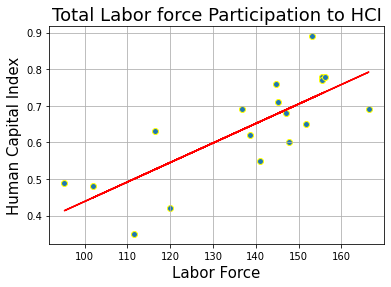

The r squared is: 0.7724040626190246


In [110]:
#Set up linear regression
x_values = HCI_els['Total LF'].astype('float')
#y_values = HCI_els['Labor Force Participation Female - 2018'].astype('float')
y_values = HCI_els['HCI'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
hci_famale_labor_regression = plt.scatter(x_values,y_values,marker='o',edgecolors='yellow')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,0),fontsize=15,color='red')
plt.grid()
plt.title('Total Labor force Participation to HCI',size=18)
plt.xlabel('Labor Force',size=15)
plt.ylabel('Human Capital Index',size=15)
plt.show()

#r2

print(f'The r squared is: {rvalue}')

* Box plot HCI (anova) among employment sectors.
    